<a href="https://colab.research.google.com/github/rodespdi/PDA2526/blob/main/Varita_M%C3%A1gica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación de la Varita Mágica

## Selección

En este libro, aprenderemos a recrear el comportamiento de la famosa herramienta **"Varita Mágica"** de los programas de edición de imágenes. En lugar de seleccionar píxeles de colores similares, nuestra varita seleccionará puntos en un plano 2D que se encuentren dentro de un "área de encantamiento" circular.

### El Concepto

La lógica detrás dl código es sencilla y se basa en estos cuatro pilares:

1.  Crearemos un espacio bidimensional con una distribución aleatoria de "partículas mágicas" (que representaremos como puntos).
2.  Definiremos un punto de origen (donde "hacemos clic" con la varita) y un "poder" o "tolerancia" (que será el radio de la aplicación de la varita).
3.  **El Encantamiento**: La varita calculará la distancia a todas las partículas y seleccionará aquellas que caigan dentro de su radio de acción.
4.  **La Visualización**: Mostraremos gráficamente todas las partículas, el punto de origen del hechizo y, por supuesto, las partículas que han sido seleccionadas.

In [7]:
# @title Paso 1: Importar las Bibliotecas Necesarias
# Primero, necesitamos importar las herramientas adecuadas para nuestro hechizo.
# Usaremos `numpy` para los cálculos numéricos y `matplotlib` para visualizar las párticulas creadas.

import numpy as np
import matplotlib.pyplot as plt

print("¡Bibliotecas mágicas importadas con éxito!")

¡Bibliotecas mágicas importadas con éxito!


## Paso 2: Crear Nuestro Mundo de Partículas

Ahora, vamos a generar un conjunto de partículas distribuidas aleatoriamente en un plano 2D.

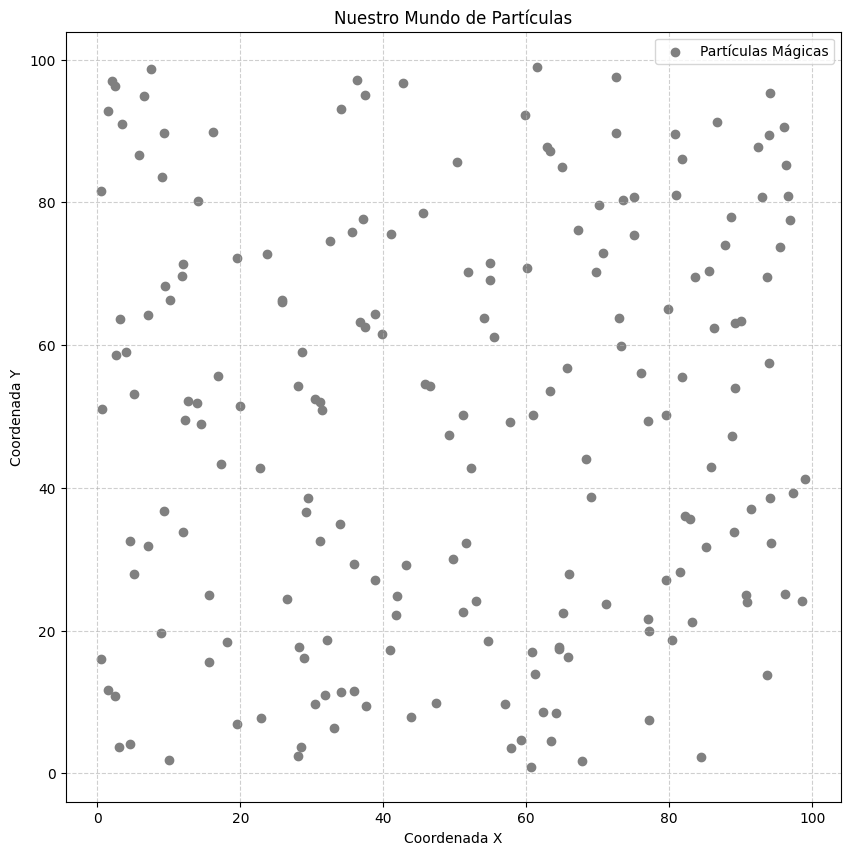

In [8]:
# @title Generar y visualizar el mundo de partículas
# Número de partículas mágicas a generar
numero_de_particulas = 200

# Generamos posiciones aleatorias (x, y) para cada partícula
# Usamos una semilla para que los resultados sean reproducibles y consistentes
np.random.seed(42)
particulas = np.random.rand(numero_de_particulas, 2) * 100

# Visualizamos nuestro mundo
plt.figure(figsize=(10, 10))
plt.scatter(particulas[:, 0], particulas[:, 1], color='gray', label='Partículas Mágicas')
plt.title('Nuestro Mundo de Partículas')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Paso 3: Definir los parámetros de la Varita Mágica

Vamos a crear una función que simule el efecto de la varita. Esta función necesitará tres parámetros:

* `punto_origen`: Dónde hacemos "clic".
* `todas_las_particulas`: El universo de puntos a considerar.
* `tolerancia`: El radio de efecto de la varita.

La función calculará la **distancia euclidiana** desde el punto de origen a cada una de las demás partículas. Si la distancia es menor o igual a la tolerancia, ¡la partícula será seleccionada!

La fórmula de la distancia euclidiana entre dos puntos $(x_1, y_1)$ y $(x_2, y_2)$ es: $$D = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

In [9]:
# @title La función `varita_magica`
def varita_magica(punto_origen, todas_las_particulas, tolerancia):
    """
    Selecciona las partículas que están dentro de un radio (tolerancia)
    desde un punto de origen.

    Args:
      punto_origen (np.array): Un array de NumPy con las coordenadas [x, y] del centro.
      todas_las_particulas (np.array): Un array 2D de NumPy con las posiciones de todas las partículas.
      tolerancia (float): El radio de selección.

    Returns:
      np.array: Un array con las partículas seleccionadas.
      np.array: Un array booleano que indica qué partículas fueron seleccionadas.
    """
    # Calculamos la distancia de todas las partículas al punto de origen de una sola vez
    distancias = np.linalg.norm(todas_las_particulas - punto_origen, axis=1)

    # Creamos una "máscara" booleana: True para las partículas dentro del radio, False para las demás
    mascara_seleccion = distancias <= tolerancia

    # Usamos la máscara para filtrar y obtener solo las partículas seleccionadas
    particulas_seleccionadas = todas_las_particulas[mascara_seleccion]

    return particulas_seleccionadas, mascara_seleccion

### Paso 4: ¡Lanzar la Varita!

Ya tenemos todo preparado. Ahora, vamos a definir los parámetros de nuestro varita e a invocar nuestra función `varita_magica`. Finalmente, visualizaremos el resultado.

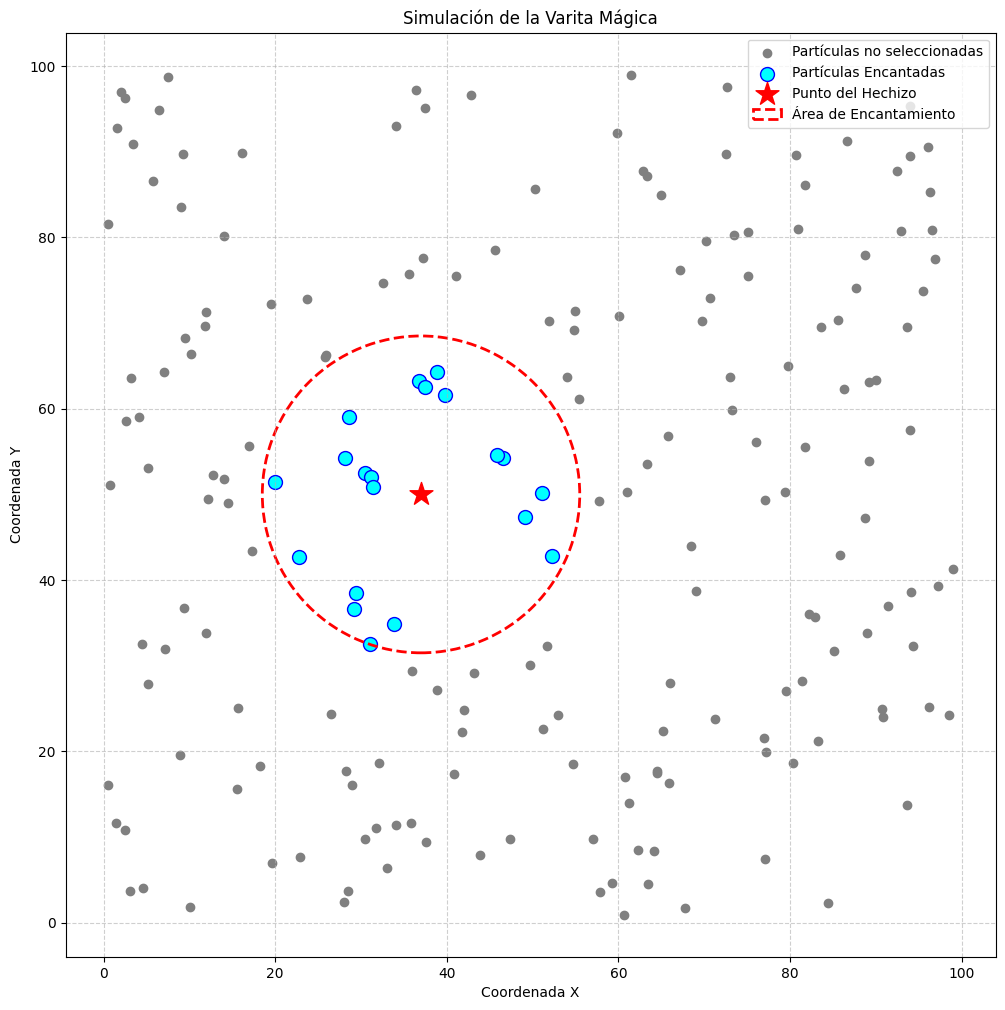

Número total de partículas: 200
Número de partículas encantadas: 20


In [14]:
# @title Lanzar la varita y visualizar los resultados

#@markdown ---
#@markdown ### ✨ Parámetros de la varita
#@markdown Define dónde "haces clic" con la varita.
posicion_x = 37 #@param {type:"slider", min:0, max:100, step:1}
posicion_y = 50 #@param {type:"slider", min:0, max:100, step:1}
#@markdown Define el poder (radio) de tu varita.
radio_del_hechizo = 18.5 #@param {type:"slider", min:0, max:50, step:0.5}
#@markdown ---

punto_del_hechizo = np.array([posicion_x, posicion_y])

# Usamos la función de la varita mágica para obtener las partículas seleccionadas
particulas_encantadas, mascara = varita_magica(punto_del_hechizo, particulas, radio_del_hechizo)

# ¡Visualicemos la magia!
plt.figure(figsize=(12, 12))

# Dibujamos todas las partículas no seleccionadas
plt.scatter(particulas[~mascara][:, 0], particulas[~mascara][:, 1], color='gray', label='Partículas no seleccionadas')

# Resaltamos las partículas encantadas
if len(particulas_encantadas) > 0:
    plt.scatter(particulas_encantadas[:, 0], particulas_encantadas[:, 1], color='cyan', edgecolor='blue', s=100, label='Partículas Encantadas')

# Marcamos el punto de origen del hechizo
plt.scatter(punto_del_hechizo[0], punto_del_hechizo[1], color='red', marker='*', s=300, label='Punto del Hechizo', zorder=5)

# Dibujamos el círculo del área de efecto
circulo_del_hechizo = plt.Circle(punto_del_hechizo, radio_del_hechizo, color='red', fill=False, linestyle='--', linewidth=2, label='Área de Encantamiento')
plt.gca().add_artist(circulo_del_hechizo)

# Configuramos el gráfico
plt.title('Simulación de la Varita Mágica')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.axis('equal') # Asegura que el círculo no se vea como una elipse
plt.show()

print(f"Número total de partículas: {len(particulas)}")
print(f"Número de partículas encantadas: {len(particulas_encantadas)}")

### ¡Experimenta!

Ahora es tu turno de modificar y experimentar. La celda de código anterior tiene **controles deslizantes interactivos**. Úsalos para cambiar los `Parámetros de la Varita` en tiempo real y observa cómo afecta a la selección.

* **`posicion_x` y `posicion_y`**: Mueve el origen del hechizo por todo el lienzo.
* **`radio_del_hechizo`**: Aumenta o disminuye el poder de tu varita para capturar más o menos partículas.